# Latar Belakang

Perusahaan supermarket memiliki data pelanggan mereka, termasuk informasi demografi dan pola pengeluaran mereka untuk berbagai produk. Data ini mencakup pengeluaran untuk produk seperti anggur, buah-buahan, daging, ikan, permen, dan emas. Dengan mengetahui bagaimana demografi mempengaruhi perilaku pembelian dapat membantu mereka membuat pilihan yang lebih baik untuk pemasaran dan penjualan produk. 

# Pernyataan Masalah

Perusahaan ingin mengetahui **kecenderungan suatu demografis untuk membeli suatu produk**. Informasi ini akan membantu perusahaan untuk mengoptimalkan distribusi produk yang sesuai dengan demand pasar, hal ini dapat meningkatkan efisiensi penjualan dan mengurangi produk tidak terpakai (akibat kadaluarsa) yang kurang diminati konsumen. Selain itu, perusahaan dapat memberikan promosi atau bundling produk sesuai dengan hasil analisis.

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

**Bagaimana perilaku konsumen dalam keputusan pembelian suatu produk berdasarkan demografis?**


## Audiens
Audiens utama dari analisis ini adalah manajemen dan tim pemasaran perusahaan supermarket, termasuk pemimpin produk, analis data, dan tim pengembangan bisnis. Selain itu, laporan ini juga dapat berguna bagi pemilik saham dan investor yang tertarik dengan strategi peningkatan penjualan dan efektivitas operasional.

# Data Understanding & Cleaning

## About The Data
Supermatket Customers Data: https://drive.google.com/drive/folders/1WodnBbuYTvsF0-6HTuQABQ0KCS31lqbK

In [1]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import zscore

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load data
df = pd.read_csv('Supermarket Customers.csv', delimiter='\t')
df.head(5)      # show 5 upper data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
# Drop columns that aren't used
# Columns to keep
cols_to_use = ['ID', 'Dt_Customer', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
all_columns = df.columns.tolist()
columns_to_drop = [col for col in all_columns if col not in cols_to_use]

# Drop columns
df = df.drop(columns=columns_to_drop)

In [4]:
# Show the columns name, type and rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                2240 non-null   int64  
 1   Year_Birth        2240 non-null   int64  
 2   Education         2240 non-null   object 
 3   Marital_Status    2240 non-null   object 
 4   Income            2216 non-null   float64
 5   Kidhome           2240 non-null   int64  
 6   Teenhome          2240 non-null   int64  
 7   Dt_Customer       2240 non-null   object 
 8   MntWines          2240 non-null   int64  
 9   MntFruits         2240 non-null   int64  
 10  MntMeatProducts   2240 non-null   int64  
 11  MntFishProducts   2240 non-null   int64  
 12  MntSweetProducts  2240 non-null   int64  
 13  MntGoldProds      2240 non-null   int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 245.1+ KB


In [5]:
# Show the statistics of the data (mean, median, ...)
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [6]:
# Show unique data in cloumns
pd.set_option('display.max_colwidth', -1)

list = []
for col in df.columns :
    list.append( [col, df[col].nunique(), df[col].unique()])

table = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=list)
table

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 328, 984, 295, 447, 712, 452, 523, 546, 398, 10, 688, 247, 856, 496, 25, 258, 565, 2, 721, 1032, 577, 64, 163, 17, 130, 292, 350, 135, 230, 7, 445, 15, 27, 505, 51, 207, 41, 386, 562, 217, 144, 454, 425, 1332, 527, 490, 378, 547, 47, 320, 34, 722, 162, 450, ...]"
9,MntFruits,158,"[88, 1, 49, 4, 43, 42, 65, 10, 0, 5, 16, 61, 2, 14, 22, 80, 17, 3, 100, 12, 34, 8, 76, 11, 164, 18, 6, 50, 19, 37, 120, 9, 51, 

## Data Duplicate
Tidak ada data duplikat

In [7]:
# Check data duplicates
duplicates = df.duplicated().sum()
print(duplicates)

0


## Missing Values
Terdapat missing value pada variabel *income*, sebanyak 24.

In [8]:
# Check missing values
df.isna().sum()

ID                  0 
Year_Birth          0 
Education           0 
Marital_Status      0 
Income              24
Kidhome             0 
Teenhome            0 
Dt_Customer         0 
MntWines            0 
MntFruits           0 
MntMeatProducts     0 
MntFishProducts     0 
MntSweetProducts    0 
MntGoldProds        0 
dtype: int64

<AxesSubplot:>

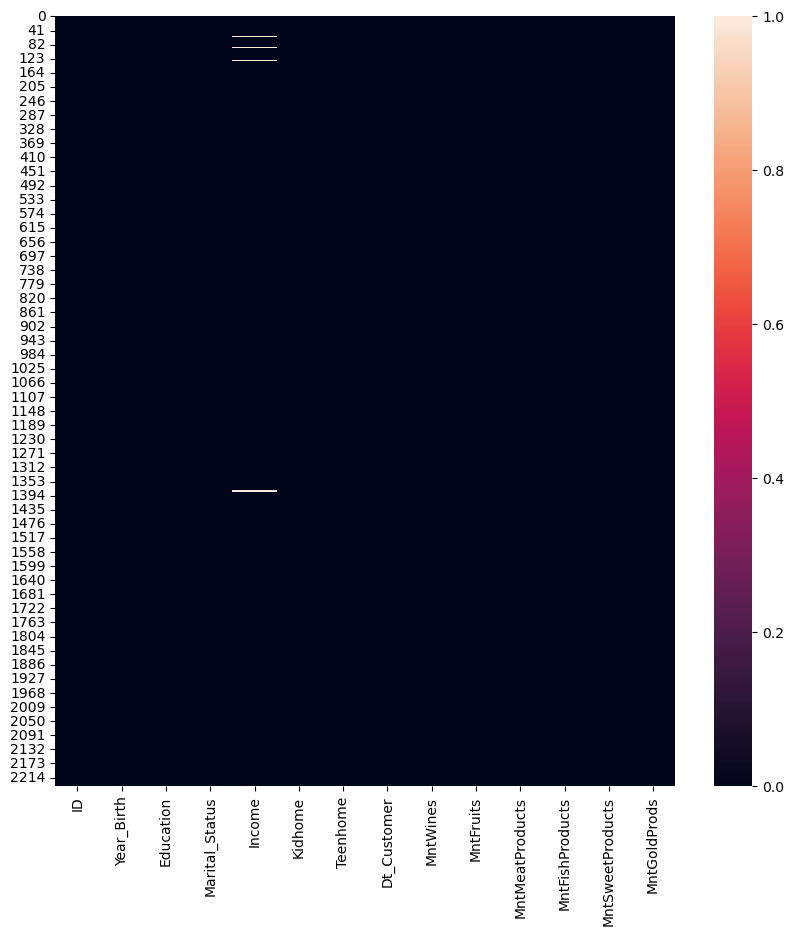

In [9]:
# Visualization of missing values
plt.figure(figsize=(10,10))
sns.heatmap(df.isna())

**Menghapus missing value pada kolom  _Income_**

Berdasarkan **_source_**, jika missing value bernilai dibawah 5% maka missing value tersebut dapat dihapus.

**_Source_**: _One rule of thumb is to remove observations if they amount to five percent or less of all values. If we have more missing values, instead of dropping them, we can replace them with a summary statistic like the mean, median, or mode, depending on the context (Link Source: https://campus.datacamp.com/courses/exploratory-data-analysis-in-python/data-cleaning-and-imputation?ex=1#:~:text=One%20rule%20of%20thumb%20is,This%20is%20known%20as%20imputation.)_

In [10]:
# Count percentage of missing values
miss_val_pct = (df['Income'].isna().sum()/len(df)*100).round(2)
print(f'{miss_val_pct}%')

1.07%


In [11]:
# Drop missing values in Income 
# 24 missing values deleted, we have 2216 length of data 
df.dropna(subset = ['Income'], inplace=True)
display(df.isna().sum())
print('Data length:',len(df))

ID                  0
Year_Birth          0
Education           0
Marital_Status      0
Income              0
Kidhome             0
Teenhome            0
Dt_Customer         0
MntWines            0
MntFruits           0
MntMeatProducts     0
MntFishProducts     0
MntSweetProducts    0
MntGoldProds        0
dtype: int64

Data length: 2216


## Outliers

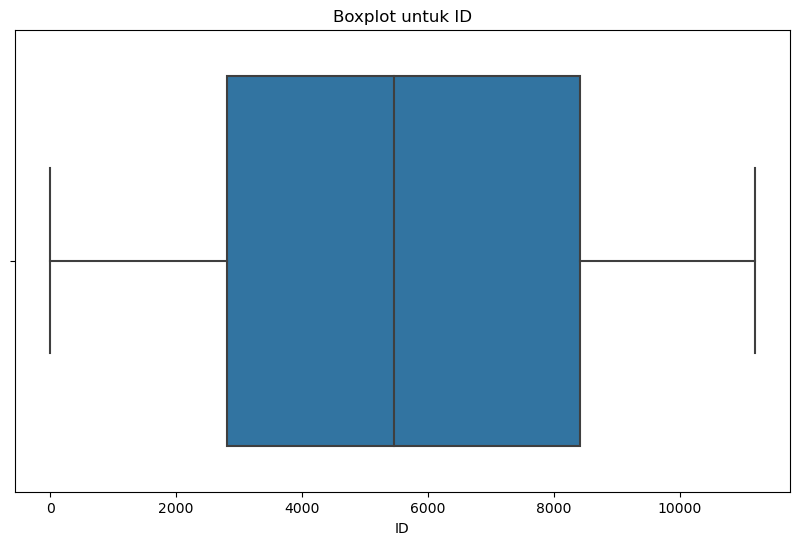

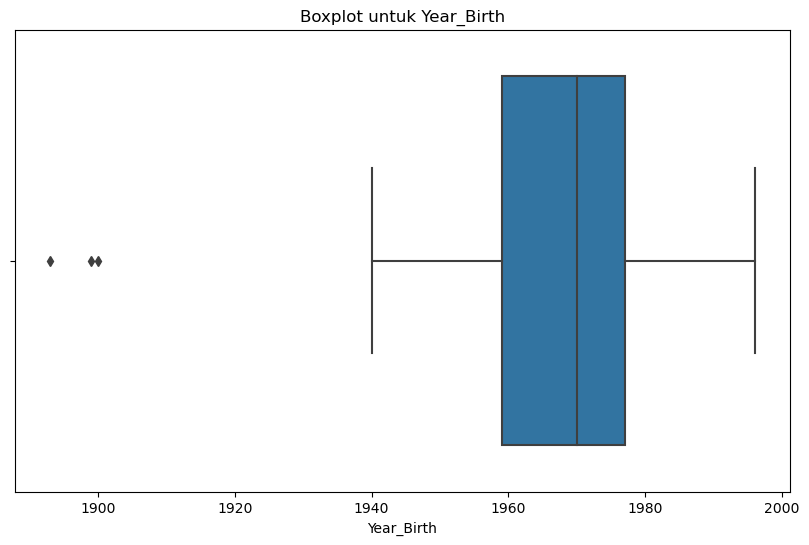

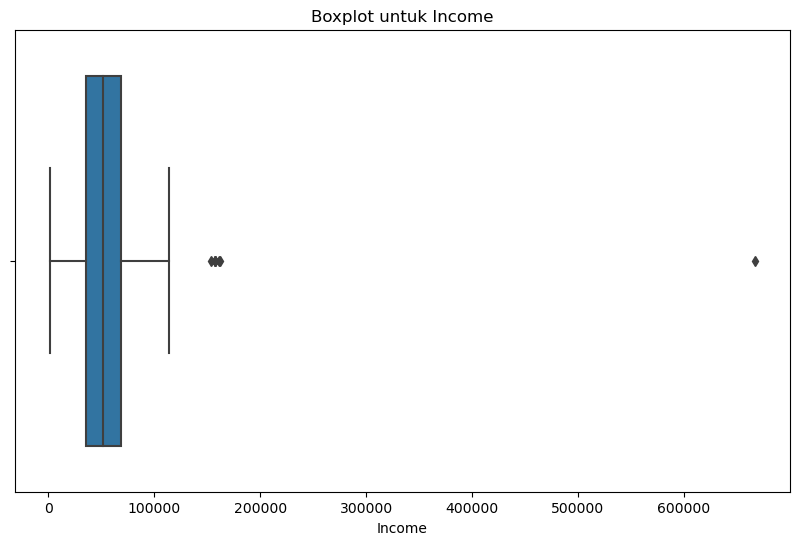

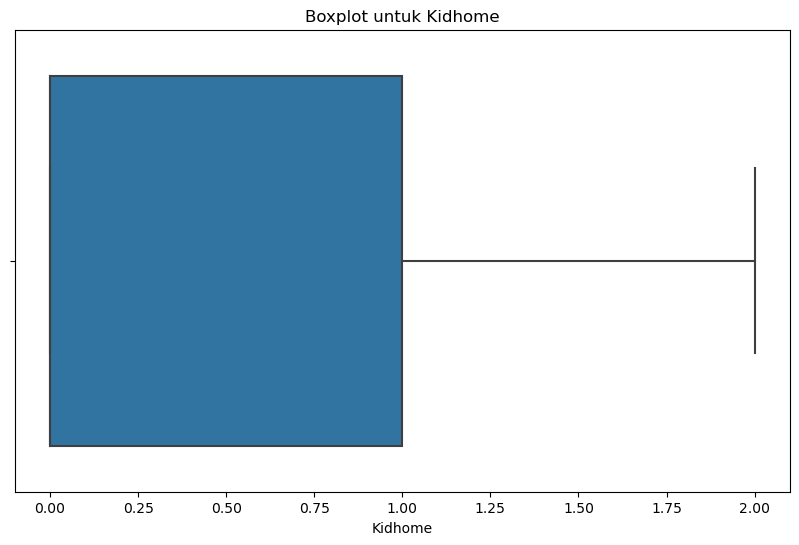

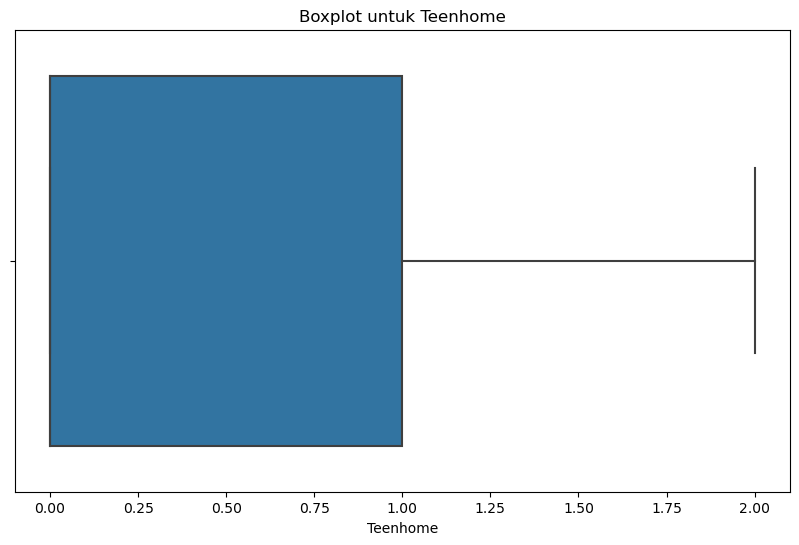

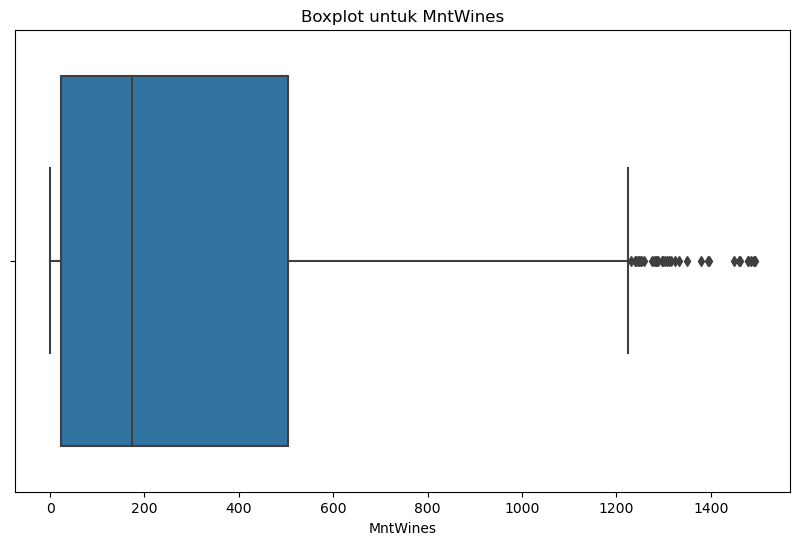

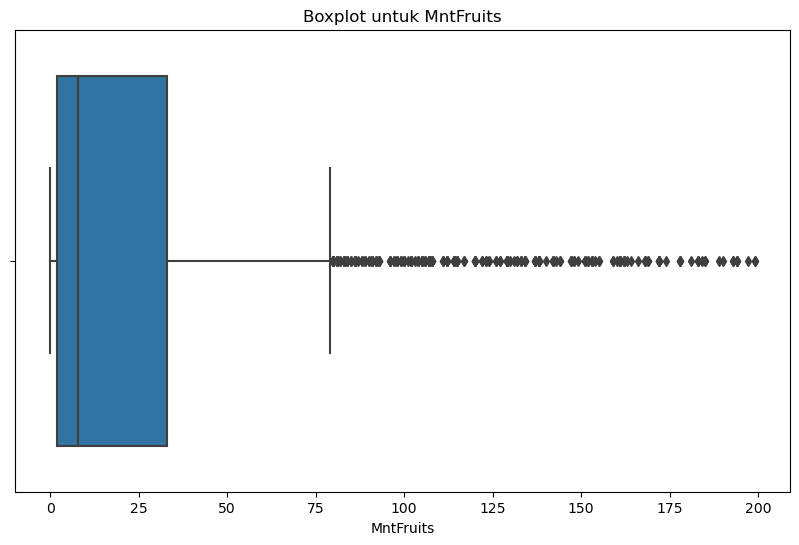

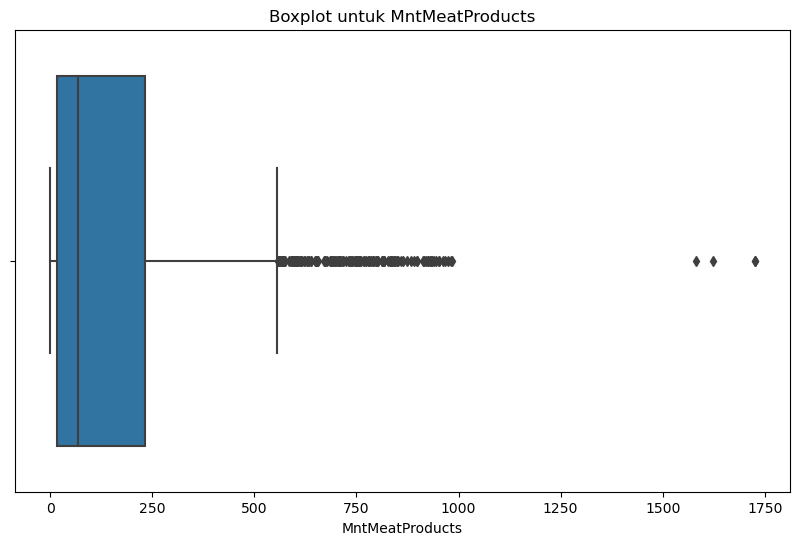

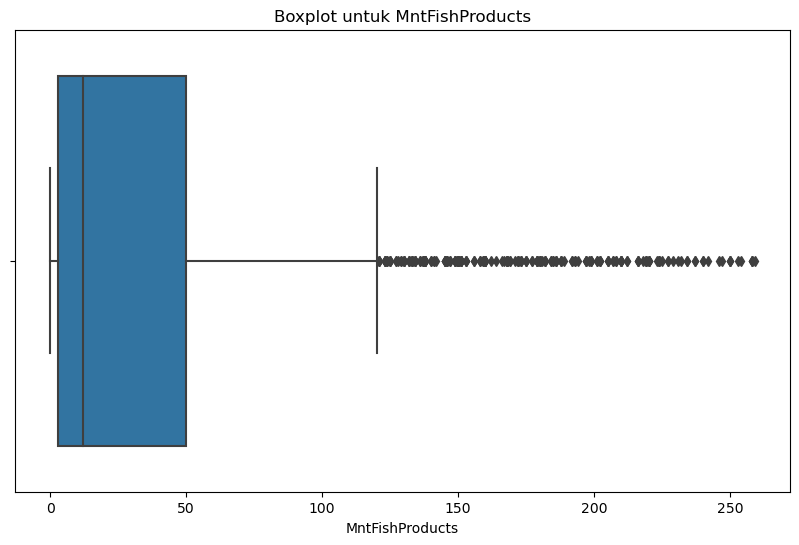

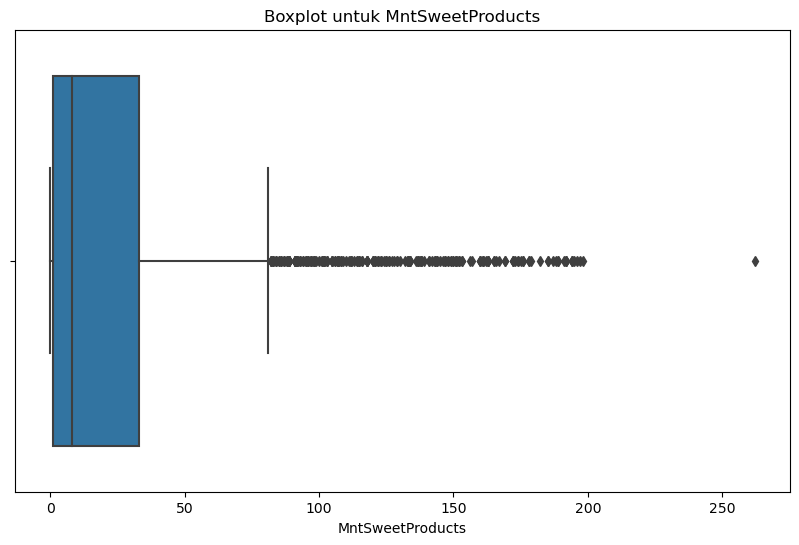

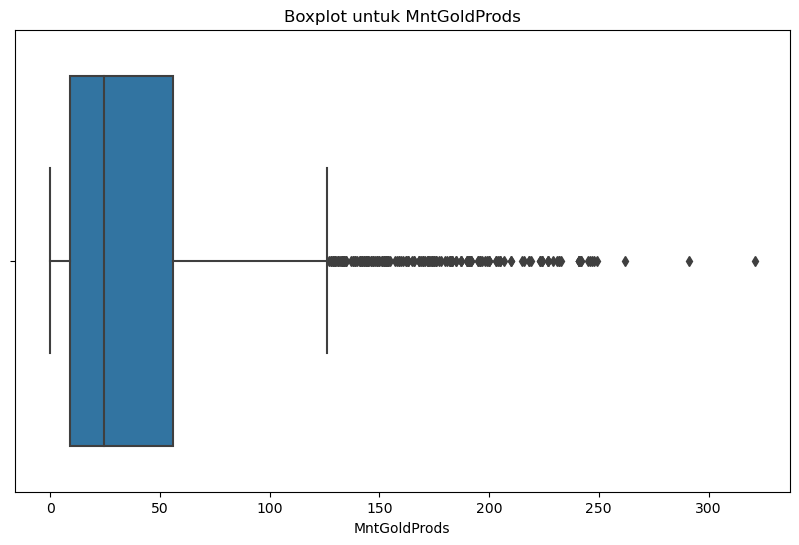

In [13]:
# Boxplot to show outliers for numeric data
import numpy as np
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot untuk {column}')
    plt.show()

In [14]:
# Count Z-score for numeric data
numeric_cols = df.select_dtypes(include=[np.number]).columns
z_scores = df[numeric_cols].apply(zscore)

# set threshold for Z-score
threshold = 3

# Find outlier
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Delete outlier from data
df_no_outliers = df[~outliers.any(axis=1)]

# count Z-score without outlier
z_scores_no_outliers = df_no_outliers[numeric_cols].apply(zscore)

# Re-check if there is any outlier
outliers_new = (z_scores_no_outliers > threshold) | (z_scores_no_outliers < -threshold)

# Show data that are considered new outliers
# print("Data yang dianggap outlier baru setelah pembersihan awal:")
# print(df_no_outliers[outliers_new.any(axis=1)])

# #Show cleaned data
# print("\nDataFrame setelah menghapus outlier:")
# print(df_no_outliers)
df = df_no_outliers
# len(df_no_outliers)

1985

# Data Preprocessing

## Mengubah Tipe Data

In [16]:
# Change data type Dt_Customer from integer to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 2239
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                1985 non-null   int64         
 1   Year_Birth        1985 non-null   int64         
 2   Education         1985 non-null   object        
 3   Marital_Status    1985 non-null   object        
 4   Income            1985 non-null   float64       
 5   Kidhome           1985 non-null   int64         
 6   Teenhome          1985 non-null   int64         
 7   Dt_Customer       1985 non-null   datetime64[ns]
 8   MntWines          1985 non-null   int64         
 9   MntFruits         1985 non-null   int64         
 10  MntMeatProducts   1985 non-null   int64         
 11  MntFishProducts   1985 non-null   int64         
 12  MntSweetProducts  1985 non-null   int64         
 13  MntGoldProds      1985 non-null   int64         
dtypes: datetime64[ns](1), fl

## Menambahkan Kolom 

### Kolom Age

Kolom _Age_ ditambahkan ke dalam dataframe untuk keperluan analisis demografis kecenderungan pembelian produk berdasarkan usia. Kalkulasi nilai _Age_ diperoleh dengan mengurangi nilai tahun saat ini dengan tahun lahir konsumen pada kolom _Year Birth_.

<AxesSubplot:>

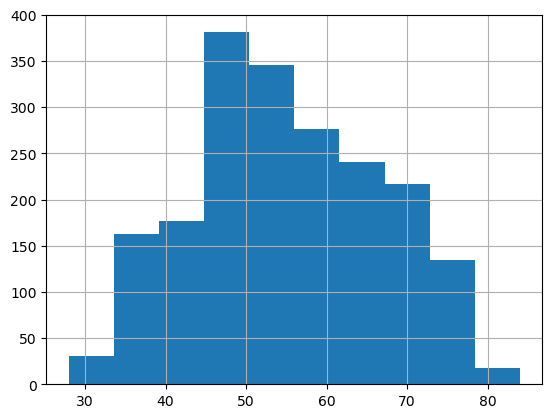

In [18]:
# Add Age based on Year_Birth
from datetime import datetime

# Current Year
current_year = datetime.now().year

# Calculate Age
df['Age'] = current_year - df['Year_Birth']
df['Age'].hist()


### Kolom Age Group (Kelompok Umur)

Kolom _Age Group_ ditambahkan ke dalam dataframe untuk keperluan analisis demografis kecenderungan pembelian produk berdasarkan kelompok usia. Kategori interval kelompok umur didasarkan pada **_source_**.

Karena umur yang terdapat pada dataset dimulai dari umur 28, maka pembagian kategori untuk kelompok umur sebagai berikut.
* Dewasa Awal   : 26 - 35 tahun
* Dewasa Akhir  : 36 - 45 tahun
* Lansia Awal   : 46 - 55 tahun
* Lansia Awal   : 56 - 65 tahun
* Manula        : > 65 tahun

**_Source_**        : Perbaikan Permohonan Pengujian Materiil Pasal 169 huruf q Undang- Undang Republik Indonesia Nomor 7 Tahun 2017 Tentang Pemilihan Umum terhadap Pasal 28D ayat (1) dan (3) Undang-Undang Dasar Republik Indonesia Tahun 1945 Terkait Pengaturan Batas Usia Maksimal Calon Presiden dan Calon Wakil Presiden

**_Link Source_**   : https://www.mkri.id/public/filepermohonan/Perbaikan%20Permohonan_3314_3042_Perbaikan%20Permohonan%20Registrasi%20107%20PUU%20XXI%202023%20(via%20email).pdf


In [19]:
# Sort age ascending, to get information about the age
df['Age'].sort_values(ascending=True)


1170    28
46      28
696     29
747     29
995     29
        ..
894     81
1150    81
358     81
424     83
1950    84
Name: Age, Length: 1985, dtype: int64

In [20]:
# Define age bins and labels
bins = [25, 35, 45, 55, 65, 200]
labels = ['26-35', '36-45', '46-55', '56-65', '>65']

# Categorize age into groups
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Reorder next to Year_Birth
df.insert(2, 'Age', df.pop('Age'))
df.insert(3, 'Age_Group', df.pop('Age_Group'))
df

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,5524,1957,67,>65,Graduation,Single,58138.0,0,0,2012-04-09,635,88,546,172,88,88
1,2174,1954,70,>65,Graduation,Single,46344.0,1,1,2014-08-03,11,1,6,2,1,6
2,4141,1965,59,56-65,Graduation,Together,71613.0,0,0,2013-08-21,426,49,127,111,21,42
3,6182,1984,40,36-45,Graduation,Together,26646.0,1,0,2014-10-02,11,4,20,10,3,5
4,5324,1981,43,36-45,PhD,Married,58293.0,1,0,2014-01-19,173,43,118,46,27,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,1974,50,46-55,Graduation,Married,34421.0,1,0,2013-01-07,3,3,7,6,2,9
2236,4001,1946,78,>65,PhD,Together,64014.0,2,1,2014-10-06,406,0,30,0,0,8
2237,7270,1981,43,36-45,Graduation,Divorced,56981.0,0,0,2014-01-25,908,48,217,32,12,24
2238,8235,1956,68,>65,Master,Together,69245.0,0,1,2014-01-24,428,30,214,80,30,61


### Kolom TotalSpent

In [21]:
# Calculate total spending for each product
df['TotalSpent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 
                       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)


### Kolom TotalChildren

In [22]:
# Create a new column for total children
df['TotalChildren'] = df['Kidhome'] + df['Teenhome']

## Data yang sudah bersih
Informasi dari data setelah cleaning dan preprocessing

In [23]:
df.tail()

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalSpent,TotalChildren
2234,8372,1974,50,46-55,Graduation,Married,34421.0,1,0,2013-01-07,3,3,7,6,2,9,30,1
2236,4001,1946,78,>65,PhD,Together,64014.0,2,1,2014-10-06,406,0,30,0,0,8,444,3
2237,7270,1981,43,36-45,Graduation,Divorced,56981.0,0,0,2014-01-25,908,48,217,32,12,24,1241,0
2238,8235,1956,68,>65,Master,Together,69245.0,0,1,2014-01-24,428,30,214,80,30,61,843,1
2239,9405,1954,70,>65,PhD,Married,52869.0,1,1,2012-10-15,84,3,61,2,1,21,172,2


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 2239
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                1985 non-null   int64         
 1   Year_Birth        1985 non-null   int64         
 2   Age               1985 non-null   int64         
 3   Age_Group         1985 non-null   category      
 4   Education         1985 non-null   object        
 5   Marital_Status    1985 non-null   object        
 6   Income            1985 non-null   float64       
 7   Kidhome           1985 non-null   int64         
 8   Teenhome          1985 non-null   int64         
 9   Dt_Customer       1985 non-null   datetime64[ns]
 10  MntWines          1985 non-null   int64         
 11  MntFruits         1985 non-null   int64         
 12  MntMeatProducts   1985 non-null   int64         
 13  MntFishProducts   1985 non-null   int64         
 14  MntSweetProducts  1985 n

In [25]:
# Show unique data in cloumns
pd.set_option('display.max_colwidth', -1)

list = []
for col in df.columns :
    list.append( [col, df[col].nunique(), df[col].unique()])

tabel = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=list)
tabel

,Column Name,Number of Unique,Unique Sample
0,ID,1985,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 387, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 1993, 4047, 1409, 7892, 2404, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 503, 8430, 2139, 9909, 7286, 6566, 8614, 1331, 9381, 6260, 10383, 7437, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 6312, 8132, 1050, 5846, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 11178, 2230, 7516, 7247, 11100, 3037, 1473, 1016, 9370, 8908, 8373, 7533, 2683, 3629, 5077, 3267, 999, 9215, 2286, 1592, 367, 5234, 9862, ...]"
1,Year_Birth,56,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1976, 1952, 1987, 1946, 1980, 1949, 1982, 1951, 1969, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1977, 1978, 1955, 1966, 1988, 1948, 1979, 1958, 1959, 1960, 1972, 1983, 1945, 1964, 1991, 1962, 1953, 1956, 1961, 1986, 1947, 1992, 1994, 1941, 1944, 1990, 1995, 1993, 1940]"
2,Age,56,"[67, 70, 59, 40, 43, 57, 53, 39, 50, 74, 48, 72, 37, 78, 44, 75, 42, 73, 55, 35, 61, 54, 51, 81, 49, 28, 56, 47, 46, 69, 58, 36, 76, 45, 66, 65, 64, 52, 41, 79, 60, 33, 62, 71, 68, 63, 38, 77, 32, 30, 83, 80, 34, 29, 31, 84]"
3,Age_Group,5,"['>65', '56-65', '36-45', '46-55', '26-35'] Categories (5, object): ['26-35' < '36-45' < '46-55' < '56-65' < '>65']"
4,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
5,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
6,Income,1763,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, 7500.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 20559.0, 21994.0, 41728.0, 72550.0, 65486.0, 35790.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 50150.0, 47823.0, 34554.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 77298.0, 57288.0, 86037.0, 43974.0, 50785.0, 90765.0, 36550.0, 30753.0, 21918.0, 56129.0, 32557.0, 19510.0, ...]"
7,Kidhome,3,"[0, 1, 2]"
8,Teenhome,3,"[0, 1, 2]"
9,Dt_Customer,651,"[2012-04-09T00:00:00.000000000, 2014-08-03T00:00:00.000000000, 2013-08-21T00:00:00.000000000, 2014-10-02T00:00:00.000000000, 2014-01-19T00:00:00.000000000, 2013-09-09T00:00:00.000000000, 2012-11-13T00:00:00.000000000, 2013-08-05T00:00:00.000000000, 2013-06-06T00:00:00.000000000, 2014-03-13T00:00:00.000000000, 2013-11-15T00:00:00.000000000, 2012-10-10T00:00:00.000000000, 2012-11-24T00:00:00.000000000, 2012-12-24T00:00:00.000000000, 2012-08-31T00:00:00.000000000, 2013-03-28T00:00:00.000000000, 2012-03-11T00:00:00.000000000, 2012-08-08T00:00:00.000000000, 2012-12-23T00:00:00.000000000, 2014-11-01T00:00:00.000000000, 2013-03-18T00:00:00.000000000, 2013-02-01T00:00:00.000000000, 2013-05-27T00:00:00.000000000, 2013-05-31T00:00:00.000000000, 2013-11-22T00:00:00.000000000, 2014-05-22T00:00:00.000000000, 2013-11-05T00:00:00.000000000, 2012-10-29T00:00:00.000000000, 2013-02-20T00:00:00.000000000, 2013-08-29T00:00:00.000000000, 2013-12-31T00:00:00.000000000, 2013-02-09T00:00:00.000000000, 2014-11-02T00:00:00.000000000, 2013-01-02T00:00:00.000000000, 2013-12-03T00:00:00.000000000, 2013-02-10T00:00:00.000000000, 2012-09-11T00:00:00.000000000, 2013-05-24T00:00:00.000000000, 2012-08-11T00:00:00.000000000, 2014-12-05T00:00:00.000000000, 2013-12-06T00:00:00.000000000, 2012-11-19T00:00:00.000000000, 2013-02-04T00:00:00.000000000, 2014-04-28T00:00:00.000000000, 2014-03-03T00:00:00.000000000, 2013-04-07T00:00:00.000000000, 2012-07-09T00:00:00.000000000, 2013-02-18T00:00:00.00000

In [26]:
# Export dataset for dashboard
# df.to_csv('Cleaned Supermarket Customer.csv', index=False)
# df.to_excel('Cleaned Supermarket Customer.xlsx', index=False)

# Analisis Data


Tahap ini merupakan tahap analisis data yang dilakukan untuk mengetahui perilaku konsumen dalam keputusan pembelian suatu produk berdasarkan demografi. Demografi merupakan data statistik tentang populasi masyarakat yang meliputi usia, jenis kelamin, dan ras. Pada analisis inin demografi yang akan dibahas meliputi:
1. Age Group
2. Education
3. Marital_Status       
4. Income               
5. Kidhome              
6. Teenhome        

Berdasarkan demografi tersebut, kita akan melihat kecenderungan konsumen dalam pembelian Wine, Fruits, Meat, Fish, Sweets, dan Gold.
* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

## Boxplot `Income` untuk setiap `Age Group`

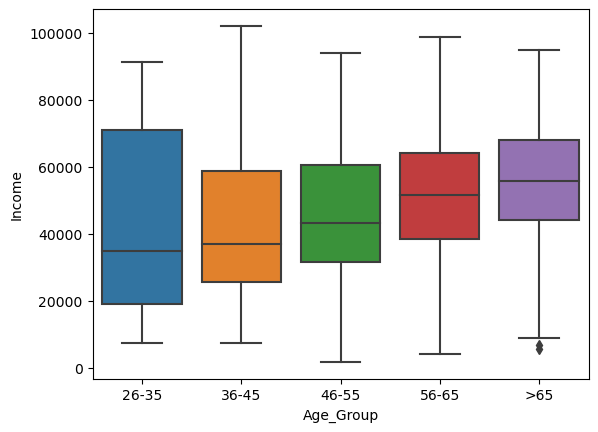

In [27]:
# Boxplot income for each age group
sns.boxplot(data=df, x ='Age_Group' , y ='Income')
plt.show()

## Berdasarkan `Income`

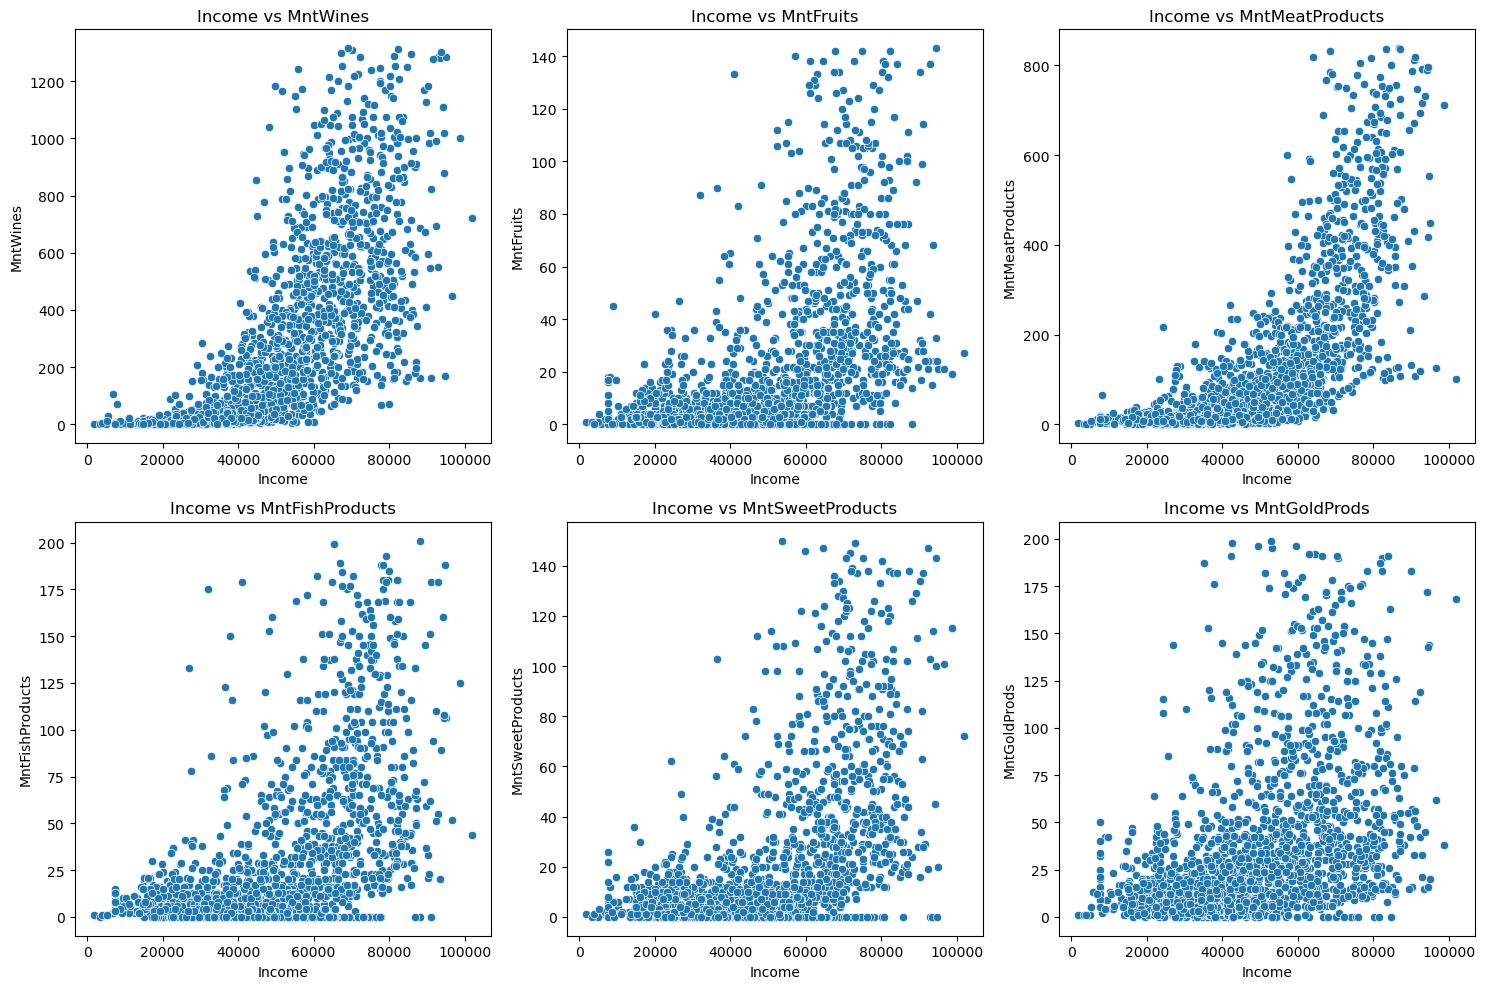

In [30]:
# List of variables
variables = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Create scatter plots
plt.figure(figsize=(15, 10))

for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x='Income', y=var, data=df)
    plt.title(f'Income vs {var}')
    plt.xlabel('Income')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

In [29]:
#Correlation matrix
correlation_matrix = df.corr()
print("Korelasi antara Income dan variabel pengeluaran:")
print(correlation_matrix['Income'][['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']])


Korelasi antara Income dan variabel pengeluaran:
MntWines            0.739065
MntFruits           0.527238
MntMeatProducts     0.719907
MntFishProducts     0.549355
MntSweetProducts    0.552526
MntGoldProds        0.425525
Name: Income, dtype: float64


Semua produk memiliki korelasi yang positif, membuktikan bahwa hubungan antara income dan pengeluaran yang dikeluarkan memiliki hubungan yang positif. Dengan meningkatnya income, maka pengeluaran untuk pembelian produk meningkat pula. Semakin mendekati nilai 1 berarti produk tersebut memiliki korelasi yang kuat. Seperti pada produk wine dan meat, yang merupakan kategori produk yang sering dibeli customer. 

## Pembelian produk berdasarkan `Age Group`

In [31]:
# Pivot table between products and age group with aggregation (count, mean, sum)
pivot_df_ag = df.pivot_table(index=['Age_Group'], values=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],aggfunc=('count', 'sum', 'mean'))
pivot_df_ag

MntFishProducts                   MntFruits                    \
                    count       mean    sum     count       mean    sum   
Age_Group                                                                 
26-35      46              35.239130  1621   46        17.021739  783     
36-45      325             28.652308  9312   325       20.526154  6671    
46-55      663             24.699849  16376  663       17.627451  11687   
56-65      453             26.626932  12062  453       19.267108  8728    
>65        498             34.604418  17233  498       22.156627  11034   

          MntGoldProds                   MntMeatProducts                     \
                 count       mean    sum           count        mean    sum   
Age_Group                                                                     
26-35      46           44.260870  2036   46              188.826087  8686    
36-45      325          33.224615  10798  325             127.827692  41544   
46-55      663          32.678733  21666  663             107.247360  71105   
56-65      453          39.231788  17772  453             124.644592  56464   
>65        498          43.710843  21768  498             168.234940  83781   

          MntSweetProducts                   MntWines                      
                     count       mean    sum    count        mean     sum  
Age_Group                                                                  
26-35      46               24.695652  1136   46       213.413043  9817    
36-45      325              21.326154  6931   325      201.218462  65396   
46-55      663              18.912519  12539  663      230.726998  152972  
56-65      453              18.852097  8540   453      304.821192  138084  
>65        498              22.789157  11349  498      358.297189  178432

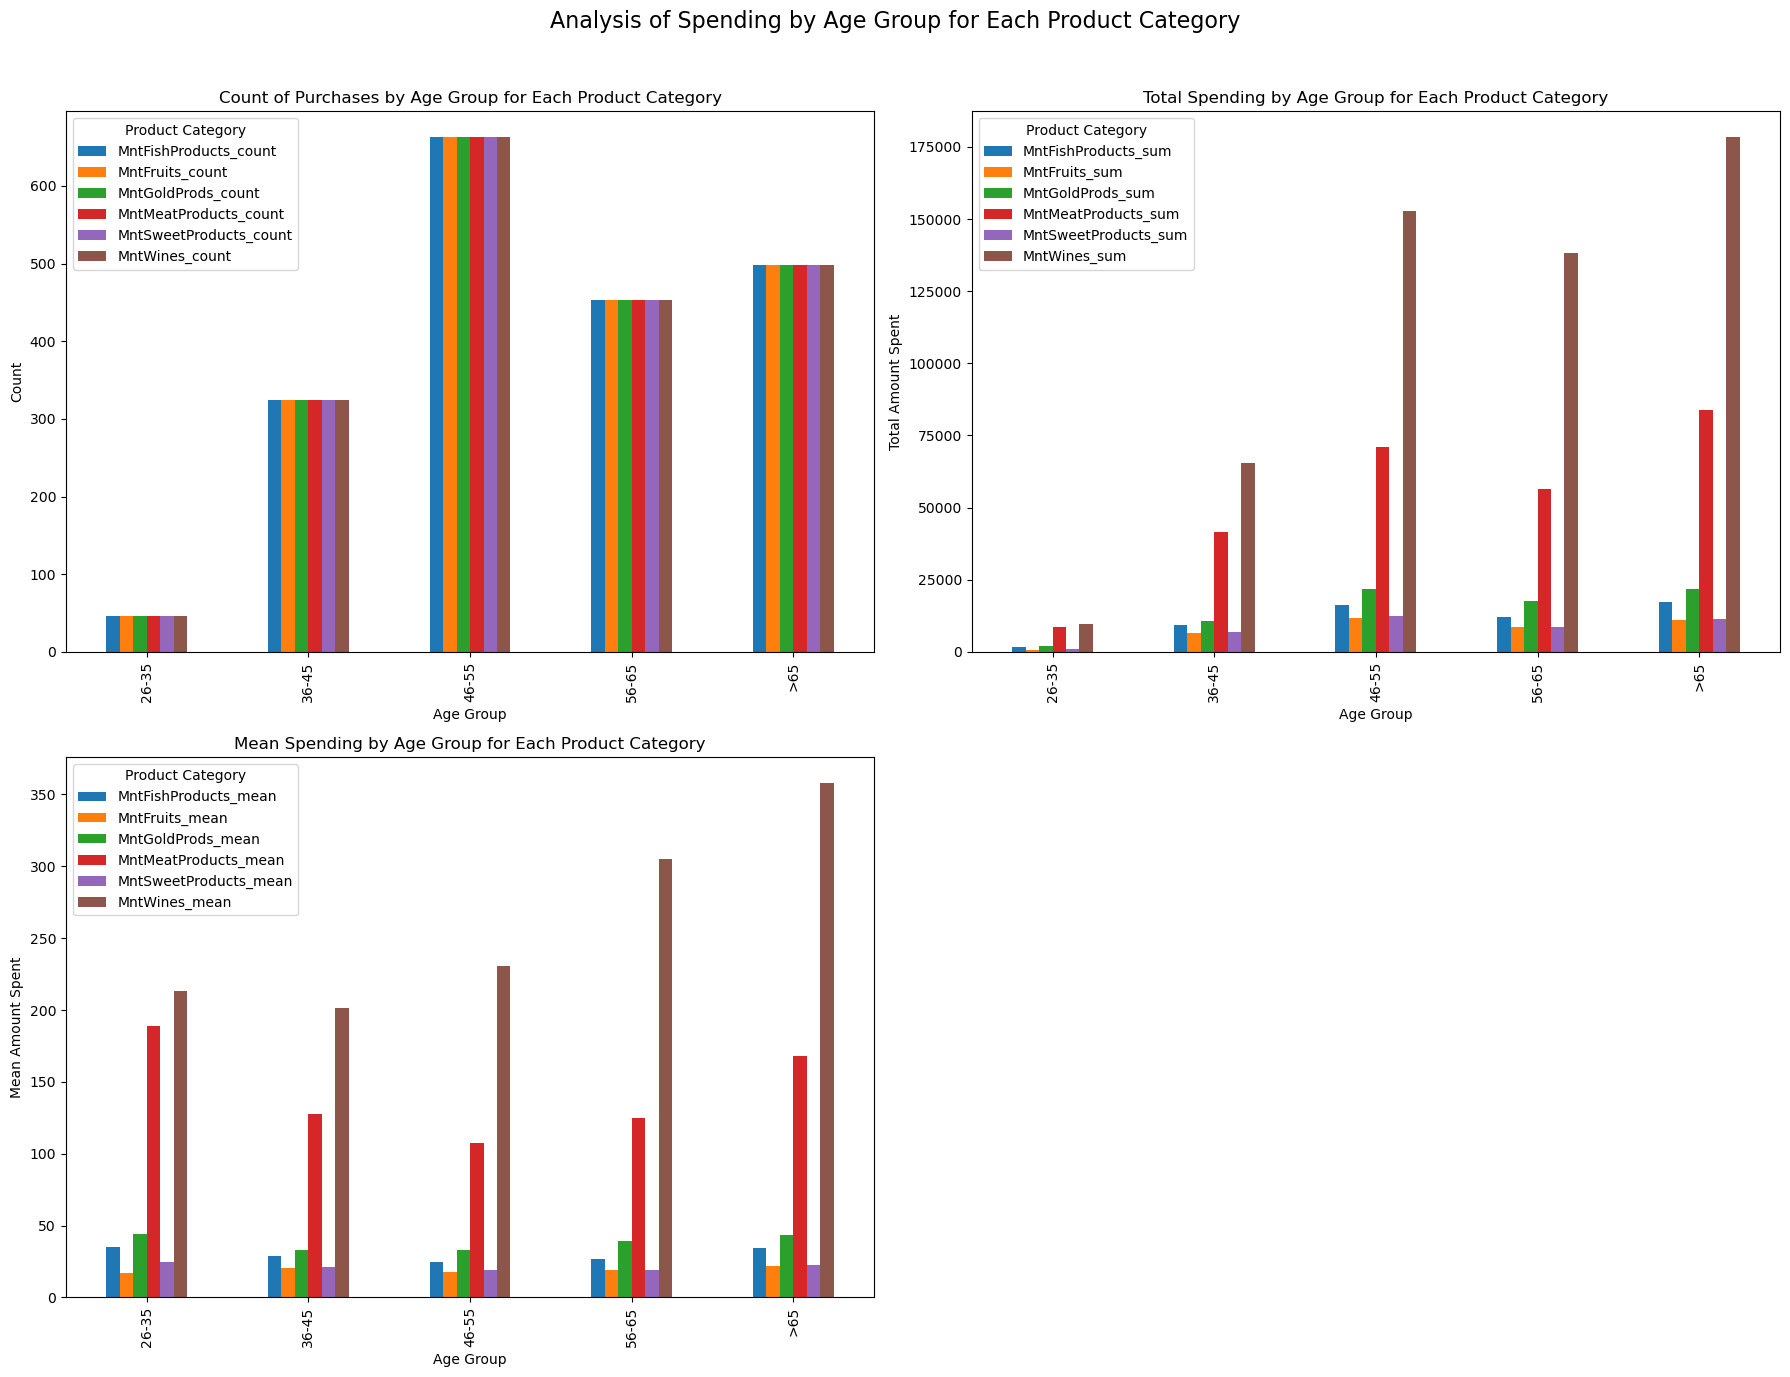

In [32]:
# Flatten multi-index columns
pivot_df_ag.columns = ['_'.join(col).strip() for col in pivot_df_ag.columns.values]

# Create subplots 
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle("Analysis of Spending by Age Group for Each Product Category", fontsize=16)

# Bar Chart for Count
count_columns = [col for col in pivot_df_ag.columns if 'count' in col]
pivot_df_ag[count_columns].plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title("Count of Purchases by Age Group for Each Product Category")
axes[0, 0].set_xlabel("Age Group")
axes[0, 0].set_ylabel("Count")
axes[0, 0].legend(title="Product Category")

# Bar Chart for Sum
sum_columns = [col for col in pivot_df_ag.columns if 'sum' in col]
pivot_df_ag[sum_columns].plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title("Total Spending by Age Group for Each Product Category")
axes[0, 1].set_xlabel("Age Group")
axes[0, 1].set_ylabel("Total Amount Spent")
axes[0, 1].legend(title="Product Category")

# Bar Chart for Mean
mean_columns = [col for col in pivot_df_ag.columns if 'mean' in col]
pivot_df_ag[mean_columns].plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title("Mean Spending by Age Group for Each Product Category")
axes[1, 0].set_xlabel("Age Group")
axes[1, 0].set_ylabel("Mean Amount Spent")
axes[1, 0].legend(title="Product Category")

# Hide unused subplot (axes[1, 1])
axes[1, 1].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Kesimpulan:
* Total jumlah pengeluaran untuk wine meningkat seiring bertambahnya usia.
* Kelompok umur >65 cenderung menghabiskan lebih banyak uang untuk semua kategori produk dibandingkan kelompok usia lain, terutama untuk wine dan meat.
* Kelompok umur 36-45 adalah yang paling hemat, dengan pengeluaran rata-rata terendah untuk semua kategori produk.
* Kelompok umur 46-55 memiliki jumlah transaksi tertinggi, namun rata-rata pengeluaran untuk pembelian produk tidak tinggi dapat disebabkan karena mereka membeli dengan kuantitas yang sedikit tetapi sering. 
* Wine dan meat merupakan produk yang paling banyak dibeli oleh semua kelompok umur.
* Pengeluaran untuk produk fish, fruits, gold, dan sweet bervariasi antar kelompok umur.

## Berdasarkan `Marital Status`

In [33]:
# Create pivot table
pivot_df_ms = df.pivot_table(
    index='Marital_Status',
    values=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
    aggfunc='mean'
)
pivot_df_ms

,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines
Marital_Status,,,,,,
Absurd,199.000000,67.000000,163.000000,500.000000,0.000000,240.000000
Alone,7.666667,4.000000,27.000000,26.333333,7.000000,184.666667
Divorced,27.866667,20.971429,40.800000,125.914286,20.495238,296.352381
Married,27.531695,19.636481,35.662354,125.134541,20.707633,271.112549
Single,29.243373,19.402410,35.865060,143.614458,20.860241,259.149398
Together,28.876448,19.254826,38.227799,133.513514,19.465251,276.133205
Widow,34.063492,19.190476,45.888889,142.380952,22.492063,331.349206
YOLO,4.000000,3.000000,42.000000,50.000000,3.000000,322.000000


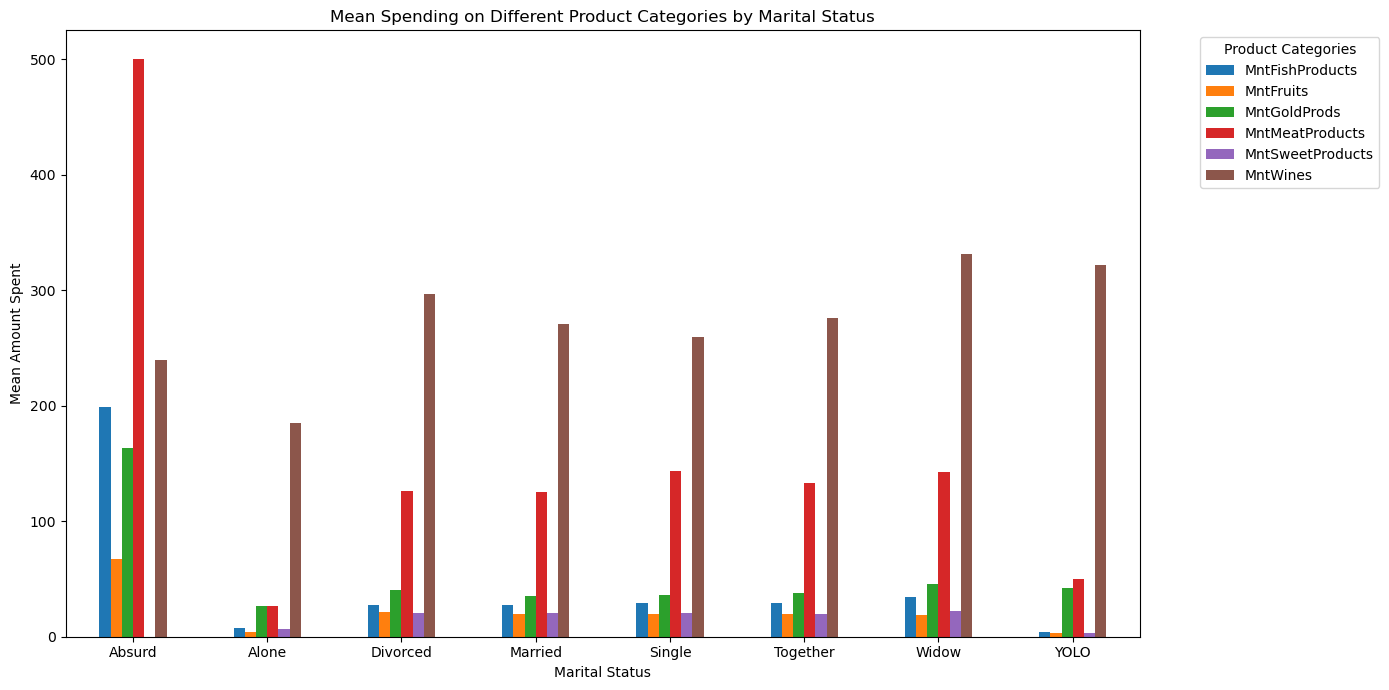

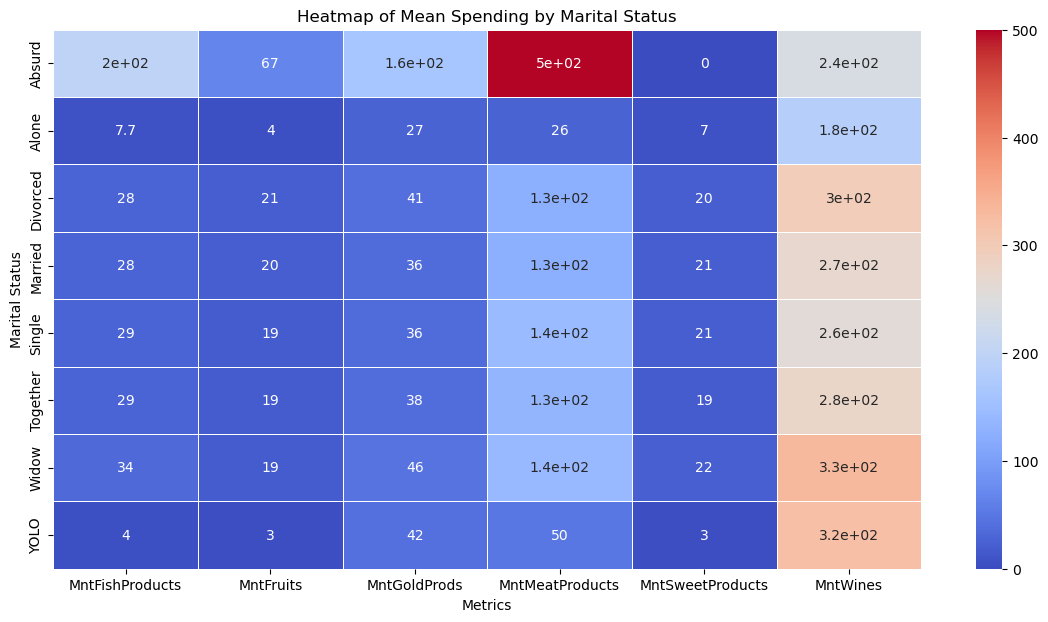

In [34]:
# Plot
pivot_df_ms.plot(kind='bar', figsize=(14, 7))
plt.title("Mean Spending on Different Product Categories by Marital Status")
plt.ylabel("Mean Amount Spent")
plt.xlabel("Marital Status")
plt.legend(title="Product Categories", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# Heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(pivot_df_ms, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Mean Spending by Marital Status")
plt.xlabel("Metrics")
plt.ylabel("Marital Status")
plt.show()


Kesimpulan

* Pembelian produk wine terbanyak pada kategori marital status widow dan absurd.
* Kategori marital status alone dan YOLO memiliki rata-rata pengeluaran lebih sedikit dibandingkan marital status lainnya.
* Pengeluaran untuk produk sweets dan fruits cukup rendah untuk setiap kategori marital status.
* Kelompok Divorced, Married, Single, dan Together memiliki pola pengeluaran yang mirip satu sama lain, dengan variasi yang tidak terlalu signifikan di antara mereka.

## Berdasarkan `Total Children` 

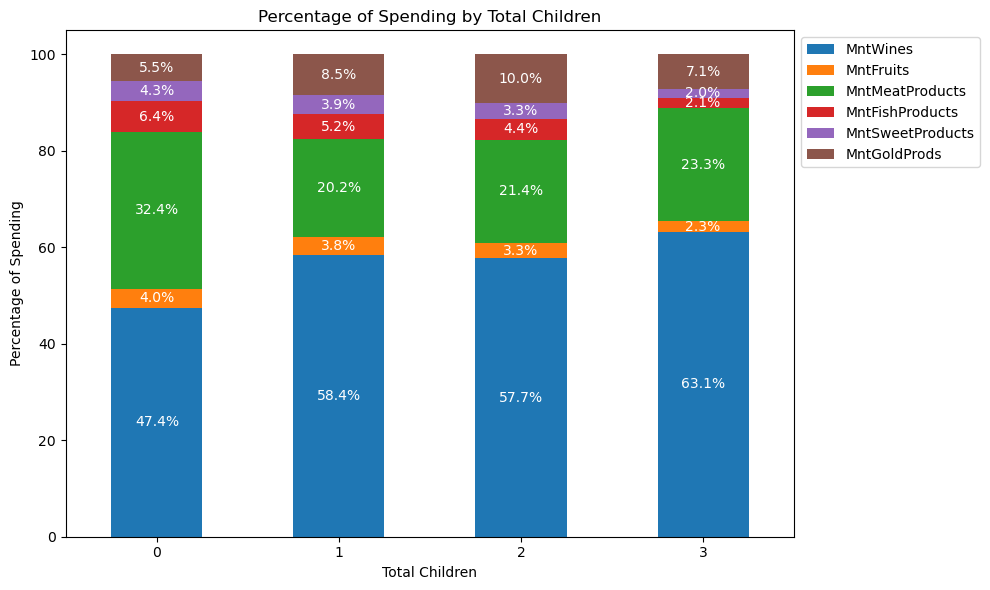

In [36]:
# Group by TotalChildren and calculate proportions
grouped = df.groupby('TotalChildren')[['MntWines', 'MntFruits', 'MntMeatProducts', 
                                       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()
proportions = grouped.div(grouped.sum(axis=1), axis=0) * 100 
ax = proportions.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the plot with percentage labels inside bars
for rect in ax.patches:
    # Find where to place the label
    x_value = rect.get_x() + rect.get_width() / 2
    y_value = rect.get_y() + rect.get_height() / 2
    
    # Format the label to display the percentage
    label = f'{rect.get_height():.1f}%'
    
    # Add the label inside the bar
    ax.text(x_value, y_value, label, ha='center', va='center', color='white', fontsize=10)

# Customize plot
plt.title('Percentage of Spending by Total Children')
plt.xlabel('Total Children')
plt.ylabel('Percentage of Spending')
plt.xticks(rotation=0)

# Move the legend outside
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()

In [37]:
# The spending between each TotalChildren is look similar for each TotalChildren. So we'll gonna make sure if there is difference between them.
# Split data
grouped_fish = [df[df['TotalChildren'] == i]['MntFishProducts'].values for i in df['TotalChildren'].unique()]
grouped_sweet = [df[df['TotalChildren'] == i]['MntSweetProducts'].values for i in df['TotalChildren'].unique()]
grouped_gold = [df[df['TotalChildren'] == i]['MntGoldProds'].values for i in df['TotalChildren'].unique()]

# ANOVA
f_stat_fish, p_value_fish = f_oneway(*grouped_fish)
f_stat_sweet, p_value_sweet = f_oneway(*grouped_sweet)
f_stat_gold, p_value_gold = f_oneway(*grouped_gold)

# ANOVA res
print("Hasil ANOVA untuk MntFishProducts:")
print(f"F-statistic: {f_stat_fish}, P-value: {p_value_fish}")

print("\nHasil ANOVA untuk MntSweetProducts:")
print(f"F-statistic: {f_stat_sweet}, P-value: {p_value_sweet}")

print("\nHasil ANOVA untuk MntGoldProds:")
print(f"F-statistic: {f_stat_gold}, P-value: {p_value_gold}")

alpha = 0.05

if p_value_fish < alpha:
    print(f"\nP-value untuk MntFishProducts ({p_value_fish:.4f}) < alpha ({alpha}): Terdapat perbedaan signifikan dalam pengeluaran untuk produk ikan antara kelompok TotalChildren.")
else:
    print(f"\nP-value untuk MntFishProducts ({p_value_fish:.4f}) >= alpha ({alpha}): Tidak ada perbedaan signifikan dalam pengeluaran untuk produk ikan antara kelompok TotalChildren.")

if p_value_sweet < alpha:
    print(f"\nP-value untuk MntSweetProducts ({p_value_sweet:.4f}) < alpha ({alpha}): Terdapat perbedaan signifikan dalam pengeluaran untuk produk manis antara kelompok TotalChildren.")
else:
    print(f"\nP-value untuk MntSweetProducts ({p_value_sweet:.4f}) >= alpha ({alpha}): Tidak ada perbedaan signifikan dalam pengeluaran untuk produk manis antara kelompok TotalChildren.")

if p_value_gold < alpha:
    print(f"\nP-value untuk MntGoldProds ({p_value_gold:.4f}) < alpha ({alpha}): Terdapat perbedaan signifikan dalam pengeluaran untuk produk emas antara kelompok TotalChildren.")
else:
    print(f"\nP-value untuk MntGoldProds ({p_value_gold:.4f}) >= alpha ({alpha}): Tidak ada perbedaan signifikan dalam pengeluaran untuk produk emas antara kelompok TotalChildren.")

Hasil ANOVA untuk MntFishProducts:
F-statistic: 163.59226265110544, P-value: 9.744885608911976e-95

Hasil ANOVA untuk MntSweetProducts:
F-statistic: 118.4761738129691, P-value: 1.4311485610513882e-70

Hasil ANOVA untuk MntGoldProds:
F-statistic: 38.99175520734978, P-value: 1.770797393818776e-24

P-value untuk MntFishProducts (0.0000) < alpha (0.05): Terdapat perbedaan signifikan dalam pengeluaran untuk produk ikan antara kelompok TotalChildren.

P-value untuk MntSweetProducts (0.0000) < alpha (0.05): Terdapat perbedaan signifikan dalam pengeluaran untuk produk manis antara kelompok TotalChildren.

P-value untuk MntGoldProds (0.0000) < alpha (0.05): Terdapat perbedaan signifikan dalam pengeluaran untuk produk emas antara kelompok TotalChildren.


- ANOVA digunakan untuk membandingkan rata-rata dari beberapa kelompok.
- ANOVA akan menunjukkan apakah variasi antara kelompok lebih besar daripada variasi dalam kelompok.
- ANOVA dapat menangani perbandingan multiple tanpa meningkatkan risiko false positive yang terlalu besar.

In [38]:
proportions

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
TotalChildren,,,,,,
0,47.445954,4.019214,32.433777,6.358286,4.267461,5.475309
1,58.426330,3.803466,20.234820,5.155245,3.907816,8.472322
2,57.706011,3.254423,21.362017,4.356543,3.304283,10.016724
3,63.146771,2.340509,23.334638,2.097847,1.988258,7.091977


Kesimpulan:

* Pengeluaran untuk produk wine meningkat seiring bertambahnya jumlah anak.  
* Rumah tangga dengan anak 3 memiliki pengeluaran tertinggi dibanding kelompok lainnya, dengan menghabiskan 63.1% pengeluaran untuk pembelian wine.
* Customer yang belum memiliki anak memiliki pengeluaran untuk produk meat, fish dan sweet lebih besar daripada customer yang memiliki anak.
* Rumah tangga dengan anak 2 memiliki pengeluaran tertinggi untuk produk gold.


## Berdasarkan `Education`


In [39]:
# Pivot table
pivot_df_ed = df.pivot_table(
    index='Education',
    values=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
    aggfunc='mean'
)
pivot_df_ed

,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines
Education,,,,,,
2n Cycle,34.325581,21.005814,39.470930,106.581395,24.343023,170.139535
Basic,13.452830,9.018868,22.698113,9.358491,9.905660,3.075472
Graduation,31.173868,21.746914,41.875514,133.702675,23.180041,247.061728
Master,24.955621,16.786982,35.798817,131.204142,16.582840,299.920118
PhD,25.002222,17.777778,29.433333,152.102222,16.993333,386.126667


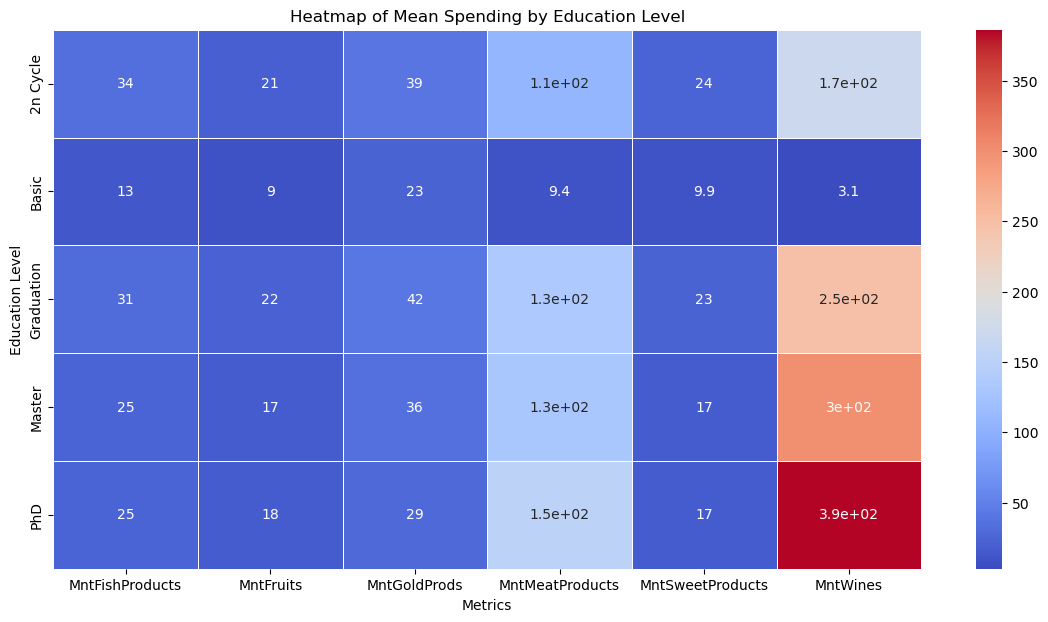

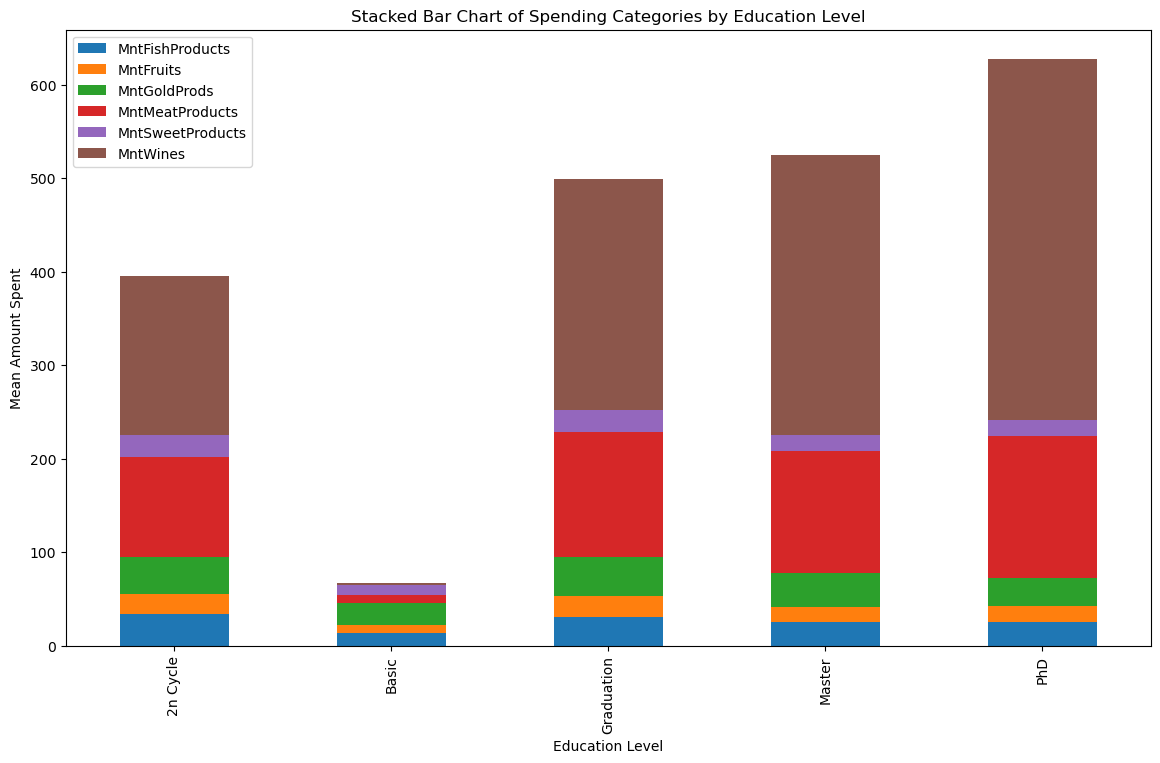

In [40]:
# Heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(pivot_df_ed, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Mean Spending by Education Level")
plt.xlabel("Metrics")
plt.ylabel("Education Level")
plt.show()

# Stacked Bar Chart for spending categories by Education Level
pivot_df_ed.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title("Stacked Bar Chart of Spending Categories by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Mean Amount Spent")
plt.show()


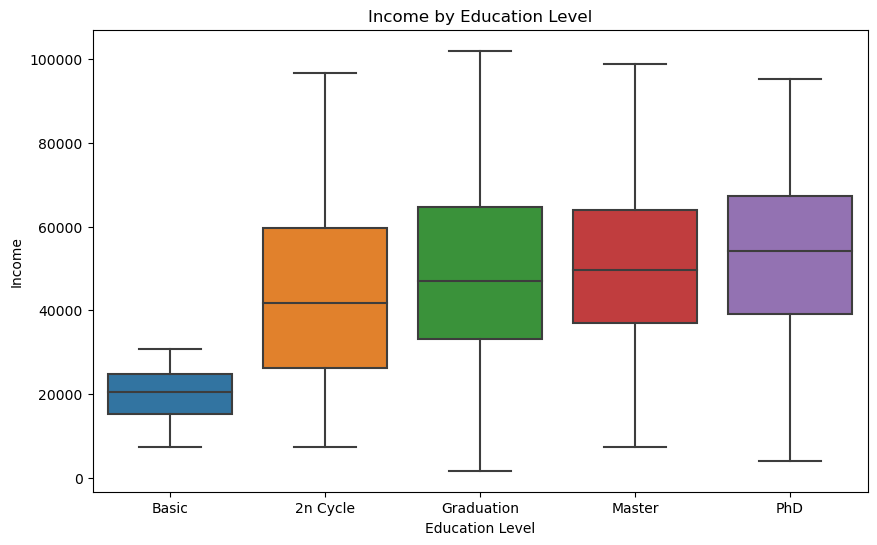

In [41]:
# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='Income', data=df, order=['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'])
plt.title('Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.show()

In [42]:
# ANOVA test
model = ols('Income ~ C(Education)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

alpha = 0.05
p_value = anova_table['PR(>F)']['C(Education)']

if p_value < alpha:
    print(f"PR(>F) (p-value) is {p_value:.4f}, which is less than alpha ({alpha}).")
    print("Reject the null hypothesis: Education has a statistically significant influence on Income.")
else:
    print(f"PR(>F) (p-value) is {p_value:.4f}, which is greater than or equal to alpha ({alpha}).")
    print("Fail to reject the null hypothesis: Education does not have a statistically significant influence on Income.")

                    sum_sq      df          F        PR(>F)
C(Education)  6.095182e+10  4.0     42.657135  2.287725e-34
Residual      7.072944e+11  1980.0 NaN        NaN          
PR(>F) (p-value) is 0.0000, which is less than alpha (0.05).
Reject the null hypothesis: Education has a statistically significant influence on Income.


Kesimpulan:
* Rata-rata pengeluaran untuk semua produk cenderung meningkat untuk setiap tingkat pendidikan dari basic sampai PhD.
* Customer dengan tingkat pendidikan basic memiliki pengeluaran yang lebih sedikit untuk semua produk dibandingkan dengan tingkat pendidikan lainnya, sedangkan tingkat pendidikan tertinggi (PhD) memmiliki pengeluaran tertinggi.
* Pengeluaran dari setiap tingkat pendidikan berhubungan dengan jumlah income yang didapat, hal ini dapat dilihat dari nilai p-value berdasarkan ANOVA.

## Kesimpulan dan Rekomendasi

### Kesimpulan
1. Semua kategori produk menunjukkan korelasi positif yang kuat dengan pendapatan. Ini mengindikasikan bahwa semakin tinggi pendapatan seseorang, semakin besar kemungkinan mereka untuk menghabiskan lebih banyak uang untuk berbagai produk.
2. Kelompok usia 46-55 tahun memiliki pendapatan tertinggi dan cenderung menghabiskan lebih banyak untuk berbagai kategori produk.
3. Pengeluaran untuk wine meningkat seiring dengan bertambahnya usia, dengan kelompok >65 tahun menjadi pengeluar terbesar untuk wine dan meat.
4. Pembelian wine dominan pada kelompok marital status widow dan absurd.
5. Terdapat variasi dalam pengeluaran untuk produk sweets dan fruits antar status pernikahan, dengan marital status alone dan YOLO memiliki pengeluaran lebih rendah.
6. Pengeluaran untuk wine meningkat seiring dengan bertambahnya jumlah anak, dengan rumah tangga 3 anak memiliki pengeluaran tertinggi untuk wine.
7. Kelompok yang belum memiliki anak cenderung menghabiskan lebih banyak untuk meat, fish, dan sweets.
8. Customer dengan status married dan satu anak memiliki pengeluaran belanja yang lebih tinggi.
9. Pengeluaran tertinggi umumnya berasal dari kelompok married, together, dan single, dengan variasi tergantung pada jumlah anak.

### Rekomendasi


#### Kampanye pemasaran yang ditargetkan berdasarkan demografis
1. Segmentasi Berdasarkan Usia, Kampanye pemasaran dapat berfokus pada produk wine dan meat yang mengedepankan kualitas dan kemewahan bagi kelompok usia 46-55 tahun yang cenderung memiliki pengeluaran tertinggi. 
2. Segmentasi Berdasarkan Status Pernikahan, Untuk kelompok marital status widow dan absurd yang cenderung membeli wine. Kampanye dapat dilakukan dengan menekankan pada pengalaman dan keistimewaan dalam menikmati produk-produk tersebut sendiri atau dengan pasangan.
3. Segmentasi Berdasarkan Jumlah Anak, Targetkan rumah tangga dengan jumlah anak tertentu dengan penawaran yang lebih praktis atau bersifat keluarga. Misalnya, bundling produk seperti meat dan fish yang merupakan sumber protein.

#### Optimasi Persediaan Produk
1. Memastikan stok wine dan meat cukup  tersedia di lokasi yang strategis sesuai dengan permintaan terbesar dari kelompok demografis tertentu, seperti kelompok usia >65 tahun.
2. Mempertimbangkan penyesuaikan distribusi atau penyimpanan produk untuk mengoptimalkan efisiensi dan kecepatan pengiriman.

#### Promosi
1. Memberikan kode diskon khusus untuk pembelian wine kepada pelanggan yang berusia di atas 65 tahun atau yang memiliki status pernikahan widow.
2. Bundling produk yang diminati customer, misalnya bundling satu botol wine dengan paket daging sapi dengan harga spesial.
3. Bundling unuk meningkatkan produk yang kurang diminati, misalnya bundling wine atau daging dengan produk lain seperti ikan, buah, emas, dan makanan manis.